## Gradient Descent

In this notebook, we will implement stochastic gradient descent on the simple function:

$\qquad$ $f(x) = x^2 - 4x - 6$

We need to know the derivative of f(x).

$\qquad$ $f'(x) = 2x - 4$

We will use this derivative to implement our gradient descent algorithm and find the function's global minimum. 

We can start with a guess that the minimum of f(x) occurs at x=7. 

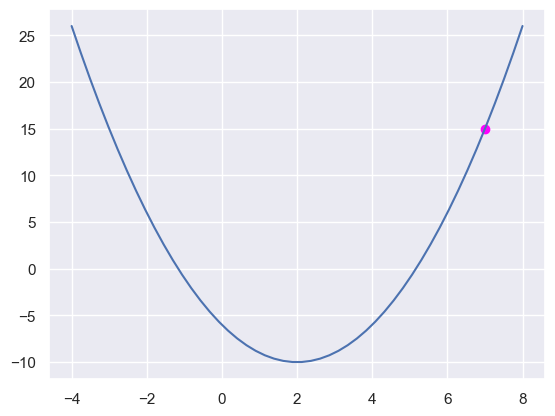

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme()

# Our function f(x)
def f(x):
    return x**2 - 4*x - 6

# Set the domain of the function
domain = np.linspace(-4, 8, 50)

plt.plot(domain, f(domain), label = 'function')

# We can start with a guess that x = 5 is our global minimum
plt.scatter([7], [f(7)], color= 'magenta')
plt.show()

Now, we can define our derivative and our descent function. For the descent function, we will start with a learning rate of 0.8. However, it is important to note that the learning rate should be tuned according to the data. It is not a one-size-fits-all parameter. 

Also, we will be moving in the opposite direction of the gradient in order to find the minimum.

The global maximum is 1.9999605134888474


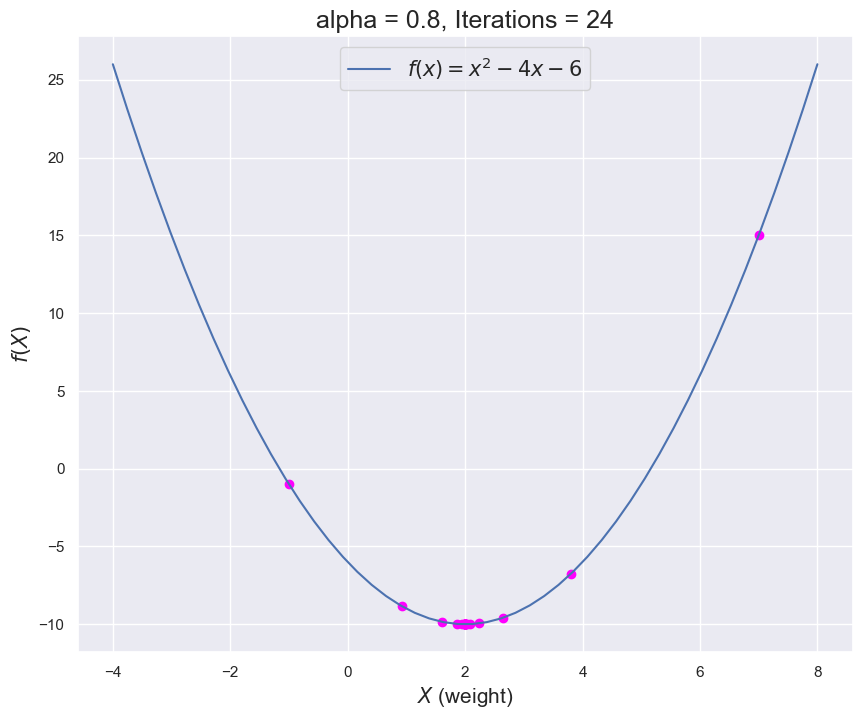

In [12]:
# Define Derivative
def d(x):
    return 2*x - 4

x_0 = 7.0

def descent(deriv, guess, alpha = 0.8, max_iter = 1_000):
    X = [guess]
    i = 0
    while abs(deriv(X[-1])) > 0.0001 and i < max_iter:
        x_new = X[-1] - alpha * deriv(X[-1])
        i+=1 
        X.append(x_new)
    return f"The global maximum is {X[-1]}", np.array(X)

gradient_result = descent(d, x_0)
X = gradient_result[1]
print(descent(d, x_0)[0])

plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(x) = x^2 - 4x - 6$")
plt.scatter(X, f(X), color = "magenta")
plt.xlabel("$X$ (weight)", fontsize = 15)
plt.ylabel("$f(X)$", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title(f"alpha = {0.8}, Iterations = {len(X)}", fontsize = 18)
plt.show()
         

As seen, we successfully found the minimum of f(x) in 24 iterations with a learning rate of 0.8. 

We can also experiment with different alphas to find the optimal choice, in terms of minimizing the number of total iterations. As we can see in the plots, a learning rate of 0.5 resulted in the least amount of iterations. 

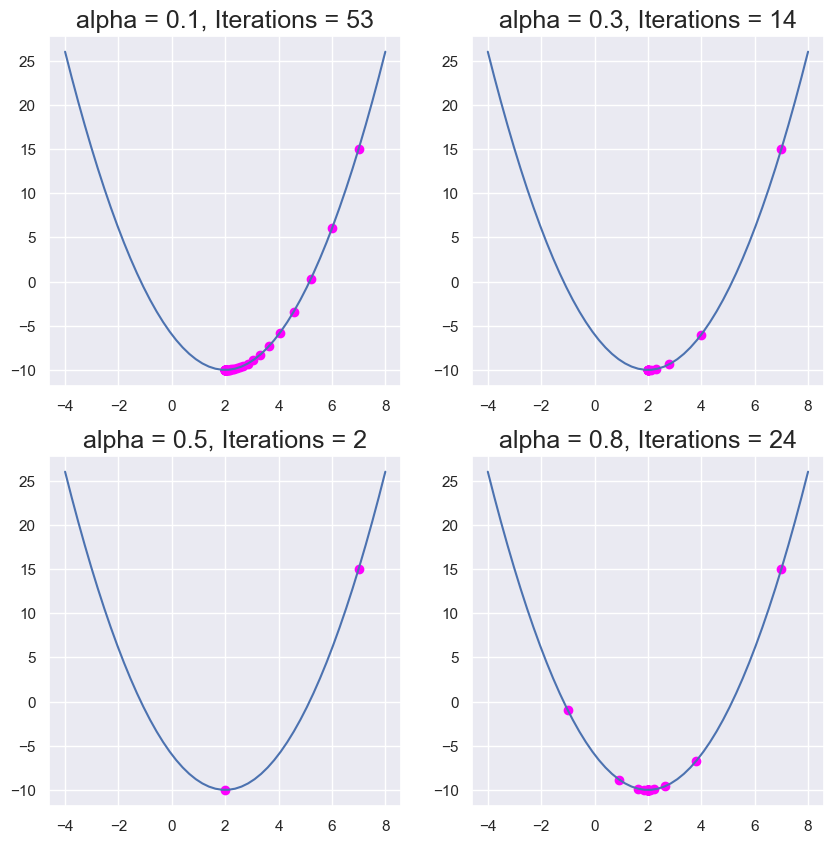

In [13]:
alphas = [0.1, 0.3, 0.5, 0.8, 1.0]

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    X = descent(d, x_0, alpha = alpha)[1]
    ax.plot(domain, f(domain))
    ax.scatter(X, f(X), color = "magenta")
    ax.set_title(f"alpha = {alpha}, Iterations = {len(X)}", fontsize = 18)

Now, we can try implementing gradient descent for a function with two variables. The concepts shown in the previous implementation should carry over to the several variable model. We can define our new function f(x, y): 

$\qquad$ $f(x,y) = (x-2)^2 + (y-2)^2 + 1$

In the below cell, we will define and visualize our function.  

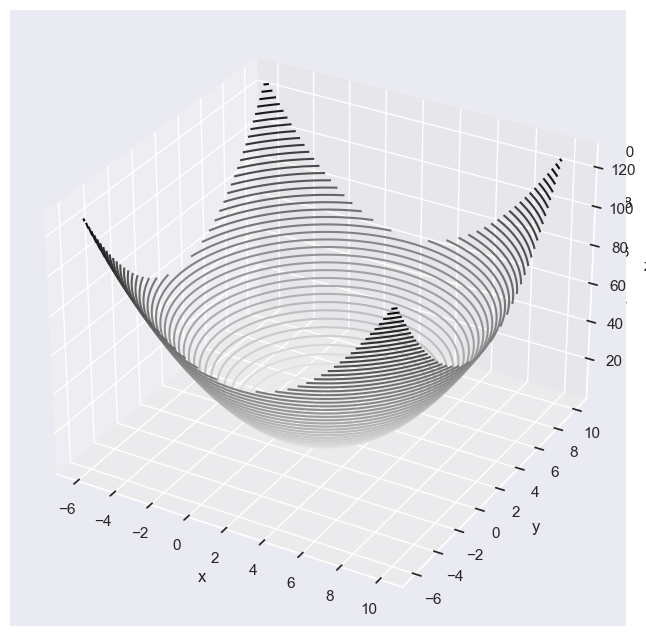

In [15]:
from mpl_toolkits import mplot3d

def f(x, y):
    return (x-2) ** 2 + (y-2) ** 2 + 1

x_domain = np.linspace(-6, 10, 300)
y_domain = np.linspace(-6, 10, 300)

X, Y = np.meshgrid(x_domain, y_domain)
Z = f(X, Y)

fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

Now, we will define our derivatives and implement the gradient descent with a learning rate of 0.8. 

Let's start with intial guesses at x = 5, y = -5. 

In [16]:
def d2(x, y):
    return [2*(x-2), 2*(y-2)]

def gradient(derivative, guesses, alpha = 0.8, max_iteration = 1000):
    X = [guesses[0]]
    Y = [guesses[1]]
    i = 0
    while(i < max_iteration):    
        derivatives = derivative(X[-1], Y[-1])
        x_new = X[-1] - alpha * derivatives[0]
        y_new = Y[-1] - alpha * derivatives[1]
        
        X.append(x_new)
        Y.append(y_new)
        
        i += 1
    
    return f"The global minimum is at x = {X[-1]}, y = {Y[-1]}", [X, Y] 

print(gradient(d2, [5.0, -5.0])[0])    

The global minimum is at x = 2.0, y = 2.0


We can visualize the path taken to reach the global minimum in our function. 

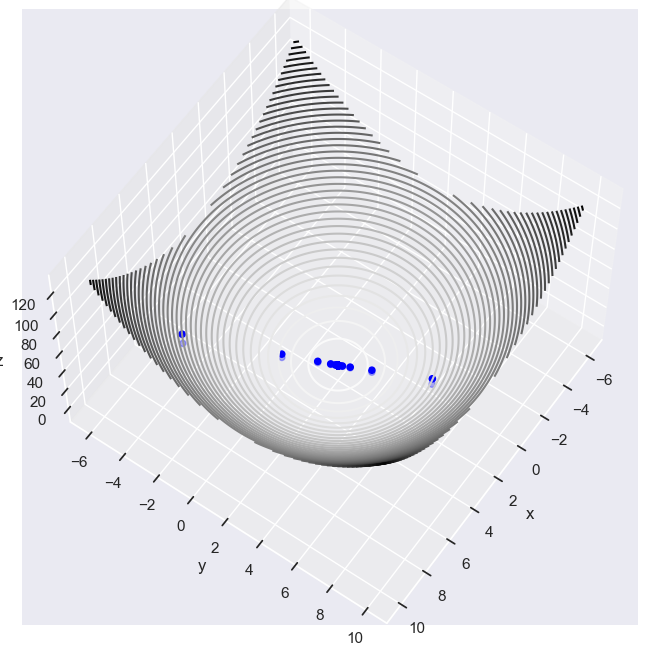

In [17]:
X_gradient = gradient(d2, [5.0, -5.0])[1][0]
Y_gradient = gradient(d2, [5.0, -5.0])[1][1]


fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
for i in range(len(X_gradient)):
    ax.scatter3D([X_gradient[i]], 
                 [Y_gradient[i]], 
                 [X_gradient[i], Y_gradient[i]], color = "blue")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(60, 35)
plt.show()

## Conclusion

Therefore, we successfully performed stochastic gradient descent on single variable and multivariable functions. 